# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Importing data and overview 

# Annotator responses data

In [2]:
# read the data
annotator_data = pd.read_json('../datasets/anonymized_project.json')

In [61]:
# get all the results
results = annotator_data['results']['root_node']['results']

In [62]:
# iterate through each key of results that has be changed to a list
keys = []
for key in [results][0]:
    keys.append(key)

1a. Number of annotators

In [82]:
# append all the annotators into a list
annotators = []
for i in range(0, len(results)):
    for j in np.arange(0, len(results[keys[i]]['results'])):
        annotators.append(results[keys[i]]['results'][j]['user']['vendor_user_id'])
        

In [83]:
# obtain the list of annotators. set method is used because some annotators appear more than once
number_of_annotators = len(set(annotators))
number_of_annotators

22

Answer: 22 annotators contributed to the dataset

1b. Average, Minimum and Maximum annotation times

In [86]:
task_output_data = []
for i in range(0, len(results)):
    for j in np.arange(0, len(results[keys[i]]['results'])):
        task_output_data.append(results[keys[i]]['results'][j]['task_output'])
        

In [101]:
annotation_times = []
for i in range(0, len(task_output_data)):
    annotation_times.append(task_output_data[i]['duration_ms'])

In [102]:
max_annotation_time = np.max(annotation_times)
max_annotation_time

42398

The maximum annotation time was 42398 ms

In [103]:
min_annotation_time = np.min(annotation_times)
min_annotation_time

-99999

The minimum annotation time was -99999 ms

In [104]:
average_annotation_time = np.mean(annotation_times)
average_annotation_time

1284.3338725652031

The average annotation time was 1284.3338725652031 ms

In [105]:
# an overview of the distribution of the annotation times
annotation_times_overview = pd.DataFrame(annotation_times).describe()
annotation_times_overview

,0
count,90870.000000
mean,1284.333873
std,1351.960465
min,-99999.000000
25%,887.000000
50%,1058.000000
75%,1328.000000
max,42398.000000


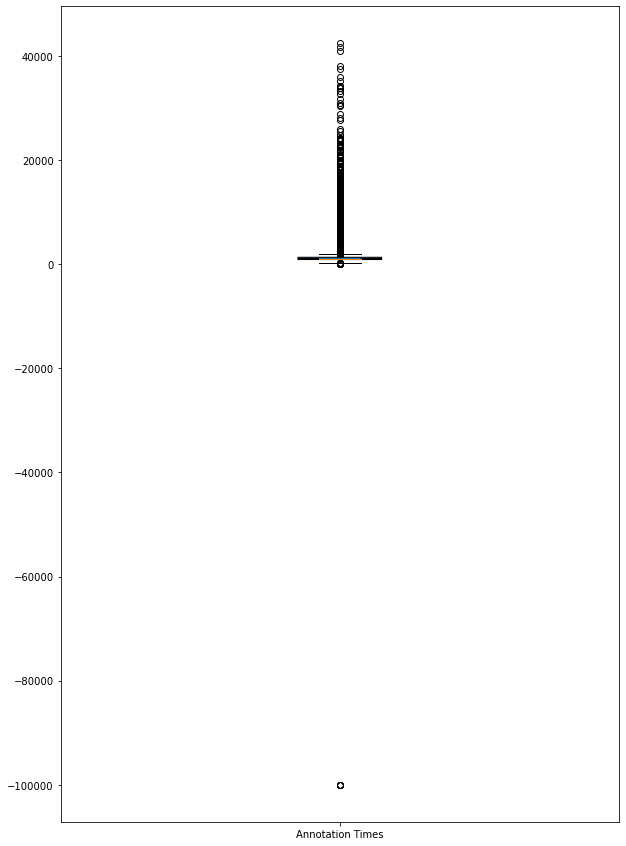

In [111]:
# Box plot to show overall statistical information on the data

plt.figure(figsize = (10, 15))
plt.boxplot(annotation_times, patch_artist=True, notch=True)
plt.xticks([1], ['Annotation Times'])
plt.show()

Observation: It can be observed that the minimum annotation time is actually an outlier

1c. Did all annotators produce same amount of results or not?

In [120]:
# dataframe creation from list_of_annotators 
annotators_df = pd.DataFrame(annotators, columns=['Annotators'])

# result dataframe from task_output_data
result_df = pd.DataFrame(task_output_data)

# concatenation of annotators_df and result_df
annotators_results_df = pd.concat([annotators_df, result_df], axis = 1)

# group by annotators to see the amount of results for each annotator
group_by_annotators = annotators_results_df.groupby('Annotators')

In [125]:
group_by_annotators.count()

,answer,cant_solve,corrupt_data,duration_ms
Annotators,,,,
annotator_01,1280,1280,1280,1280
annotator_02,7596,7596,7596,7596
annotator_03,630,630,630,630
annotator_04,6421,6421,6421,6421
annotator_05,3475,3475,3475,3475
annotator_06,5337,5337,5337,5337
annotator_07,2175,2175,2175,2175
annotator_08,6537,6537,6537,6537
annotator_09,4860,4860,4860,4860


Answer: From the dataframe, it can observed that not all annotators produced the same amount of results. They all produced different amount of results

1d. Questions for which annotators disagree

In [126]:
task_input_data = []
for i in range(0, len(results)):
    for j in np.arange(0, len(results[keys[i]]['results'])):
        task_input_data.append(results[keys[i]]['results'][j]['task_input'])

In [127]:
task_input_data

[{'image_url': 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg'},
 {'image_url': 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg'},
 {'image_url': 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg'},
 {'image_url': 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg'},
 {'image_url': 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg'},
 {'image_url': 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg'},
 {'image_url': 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg'},
 {'image_url': 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg'},
 {'image_url': 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg'},
 {'image_url': 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg'},
 {'image_url': 'https://qm-aut

In [128]:
# obtain the images
image_urls = []
for i in range(0, len(task_input_data)):
    image_urls.append(task_input_data[i]['image_url'])
image_urls

['https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg',
 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg',
 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg',
 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg',
 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg',
 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg',
 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg',
 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg',
 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg',
 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4686.jpg',
 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_8607.jpg',
 'https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_8607.jpg',
 'https://qm-aut

In [129]:
images = []
for url in image_urls:
    searchObj = re.search( r'img_(.+?).jpg', url, re.M|re.I)
    images.append(searchObj.group())
images_df = pd.DataFrame(images, columns=['Images'])

In [130]:
answers = []
get_property(task_output_data, answers, 'answer' )
answers_df = pd.DataFrame(answers, columns=['Answers'])
answers_df

,Answers
0,no
1,no
2,no
3,no
4,no
...,...
90865,yes
90866,yes
90867,yes
90868,yes


In [131]:
df = pd.concat([annotators_df, images_df, answers_df], axis=1)
df

,Annotators,Images,Answers
0,annotator_12,img_4686.jpg,no
1,annotator_11,img_4686.jpg,no
2,annotator_22,img_4686.jpg,no
3,annotator_17,img_4686.jpg,no
4,annotator_02,img_4686.jpg,no
...,...,...,...
90865,annotator_12,img_2866.jpg,yes
90866,annotator_16,img_2866.jpg,yes
90867,annotator_12,img_2866.jpg,yes
90868,annotator_04,img_2866.jpg,yes


# TODO: analyze the data above preferably with a graph

2

In [132]:
cant_solve = []
get_property(task_output_data, cant_solve, 'cant_solve')
cant_solve_df = pd.DataFrame(cant_solve, columns=['Cant Solve'])

In [134]:
corrupt_data = []
get_property(task_output_data, corrupt_data, 'corrupt_data')
corrupt_data_df = pd.DataFrame(corrupt_data, columns=['Corrupt Data'])

In [139]:
# dataframe of annotators, cant_solve and corrupt_data
new_df = pd.concat([annotators_df,images_df, cant_solve_df, corrupt_data_df], axis = 1)
new_df

,Annotators,Images,Cant Solve,Corrupt Data
0,annotator_12,img_4686.jpg,False,False
1,annotator_11,img_4686.jpg,False,False
2,annotator_22,img_4686.jpg,False,False
3,annotator_17,img_4686.jpg,False,False
4,annotator_02,img_4686.jpg,False,False
...,...,...,...,...
90865,annotator_12,img_2866.jpg,False,False
90866,annotator_16,img_2866.jpg,False,False
90867,annotator_12,img_2866.jpg,False,False
90868,annotator_04,img_2866.jpg,False,False


In [140]:
new_df[(new_df['Cant Solve'] == True) | (new_df['Corrupt Data'] == True)]

,Annotators,Images,Cant Solve,Corrupt Data
2742,annotator_18,img_0879.jpg,True,False
3943,annotator_22,img_3258.jpg,True,False
4194,annotator_18,img_2246.jpg,False,True
7413,annotator_11,img_6156.jpg,True,False
7733,annotator_06,img_8216.jpg,False,True
11008,annotator_07,img_1465.jpg,True,False
15243,annotator_04,img_4374.jpg,True,False
15738,annotator_08,img_8804.jpg,True,False
19432,annotator_08,img_2191.jpg,True,False
22669,annotator_08,img_0254.jpg,False,True


# TODO: analyze data above

# Reference Data

In [30]:
reference_data = pd.read_json('../datasets/references.json')

In [31]:
reference_data

,img_4686,img_8607,img_5541,img_3218,img_3247,img_1876,img_6228,img_4653,img_5488,img_8591,...,img_3563,img_7393,img_7061,img_6877,img_2192,img_5282,img_0628,img_7736,img_1042,img_2866
is_bicycle,False,True,False,False,True,True,True,False,True,False,...,True,False,False,True,True,True,True,True,False,True
